# EcoType – Model Training & Hyperparameter Tuning

Models trained:
- Logistic Regression
- K-Nearest Neighbors
- Random Forest
- XGBoost
- Decision Tree

Includes:
- Evaluation metrics
- Confusion matrix
- Hyperparameter tuning
- Best model saving


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import joblib
import os


In [5]:
df = pd.read_csv("final_preprocessed_data.csv")
df.head

X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

print(X.shape, y.shape)


(721497, 19) (721497,)


In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

os.makedirs("models", exist_ok=True)
joblib.dump(le, "models/label_encoder.pkl")

print("Classes:", le.classes_)


Classes: [0 1 2 3 4 5 6]


✂ 3. Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)



In [8]:
print("Before SMOTE:\n", y_train.value_counts())


Before SMOTE:
 1    82457
2    82457
0    82457
5    82457
4    82457
3    82456
6    82456
Name: count, dtype: int64


In [9]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:\n", pd.Series(y_train_res).value_counts())



After SMOTE:
 1    82457
3    82457
2    82457
6    82457
0    82457
4    82457
5    82457
Name: count, dtype: int64


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

## Helper Function for Model Evaluation


In [17]:
def evaluate_model(model, Xtr, Xt, ytr, yt):
    model.fit(Xtr, ytr)
    y_pred = model.predict(Xt)
    acc = accuracy_score(yt, y_pred)
    print(classification_report(yt, y_pred))
    return acc, y_pred



🤖 4. Train Models

## 1. Logistic Regression


In [18]:
lr = LogisticRegression(max_iter=500)
lr_acc, lr_pred = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train_res, y_test)



              precision    recall  f1-score   support

           0       0.75      0.81      0.78     20614
           1       0.78      0.87      0.82     20614
           2       0.63      0.65      0.64     20614
           3       0.97      0.98      0.97     20615
           4       0.63      0.63      0.63     20614
           5       0.65      0.53      0.59     20614
           6       0.71      0.66      0.68     20615

    accuracy                           0.73    144300
   macro avg       0.73      0.73      0.73    144300
weighted avg       0.73      0.73      0.73    144300



## 2. Random Forest


In [19]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_acc, rf_pred = evaluate_model(rf, X_train_res, X_test, y_train_res, y_test)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20614
           1       1.00      1.00      1.00     20614
           2       1.00      1.00      1.00     20614
           3       1.00      1.00      1.00     20615
           4       0.98      0.97      0.98     20614
           5       1.00      1.00      1.00     20614
           6       0.97      0.98      0.98     20615

    accuracy                           0.99    144300
   macro avg       0.99      0.99      0.99    144300
weighted avg       0.99      0.99      0.99    144300



## 3. XGBoost


In [16]:
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_acc, xgb_pred = evaluate_model(xgb, X_train_res, X_test, y_train_res, y_test)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20614
           1       0.99      1.00      0.99     20614
           2       0.94      0.96      0.95     20614
           3       0.99      1.00      1.00     20615
           4       0.94      0.94      0.94     20614
           5       0.96      0.94      0.95     20614
           6       0.95      0.93      0.94     20615

    accuracy                           0.97    144300
   macro avg       0.97      0.97      0.97    144300
weighted avg       0.97      0.97      0.97    144300



## 4. K-Nearest Neighbors


In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_acc, knn_pred = evaluate_model(knn, X_train_scaled, X_test_scaled, y_train_res, y_test)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20614
           1       1.00      1.00      1.00     20614
           2       1.00      1.00      1.00     20614
           3       0.99      1.00      1.00     20615
           4       0.98      0.89      0.93     20614
           5       1.00      1.00      1.00     20614
           6       0.92      0.97      0.95     20615

    accuracy                           0.98    144300
   macro avg       0.98      0.98      0.98    144300
weighted avg       0.98      0.98      0.98    144300



## Train Decision Tree



In [18]:
dt = DecisionTreeClassifier(random_state=42)
dt_acc, dt_pred = evaluate_model(dt, X_train_res, X_test, y_train_res, y_test)




              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20614
           1       0.99      1.00      1.00     20614
           2       0.99      0.99      0.99     20614
           3       0.99      1.00      1.00     20615
           4       0.96      0.95      0.96     20614
           5       0.98      0.99      0.98     20614
           6       0.96      0.96      0.96     20615

    accuracy                           0.98    144300
   macro avg       0.98      0.98      0.98    144300
weighted avg       0.98      0.98      0.98    144300



## 📊 Model Comparison Summary


In [19]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [lr_acc, knn_acc, dt_acc, rf_acc, xgb_acc]
})

results.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
3,Random Forest,0.992245
2,Decision Tree,0.981788
1,KNN,0.980312
4,XGBoost,0.967554
0,Logistic Regression,0.734103


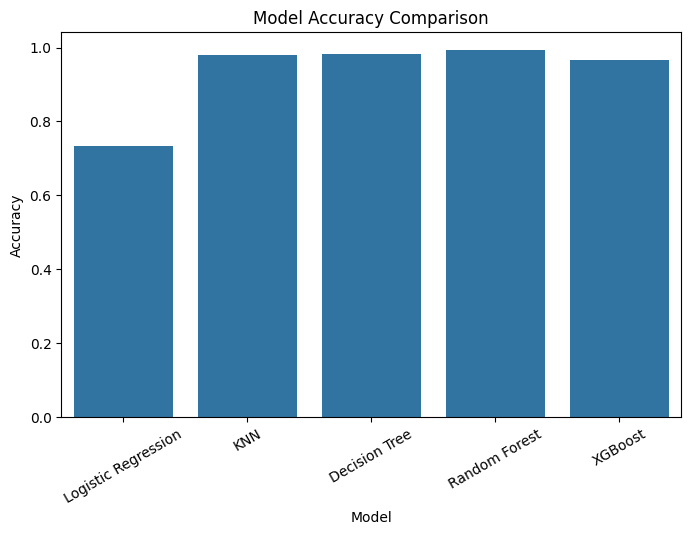

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()


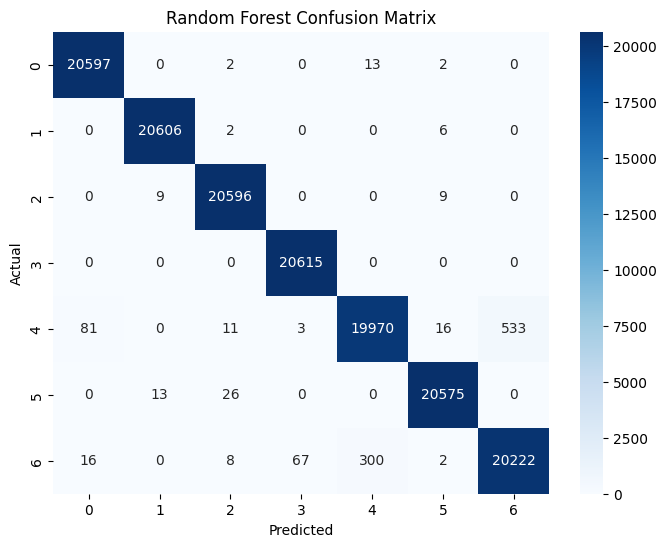

In [21]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Cross Validation Accuracy Scores

Cross-validation scores: [0.99115558 0.99069647 0.9906185  0.99119889 0.99113818]
Mean CV accuracy: 0.9909615231084146


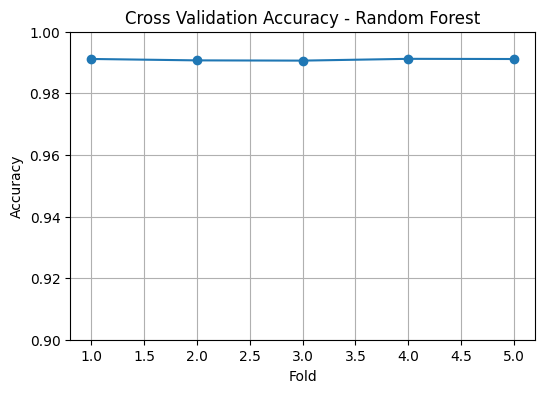

In [23]:
cv_scores = cross_val_score(rf, X_train_res, y_train_res, cv=5, scoring="accuracy")
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

plt.figure(figsize=(6,4))
plt.plot(range(1,6), cv_scores, marker="o")
plt.title("Cross Validation Accuracy - Random Forest")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.9,1.0)
plt.grid()
plt.show()


## Feature Importance (Random Forest)

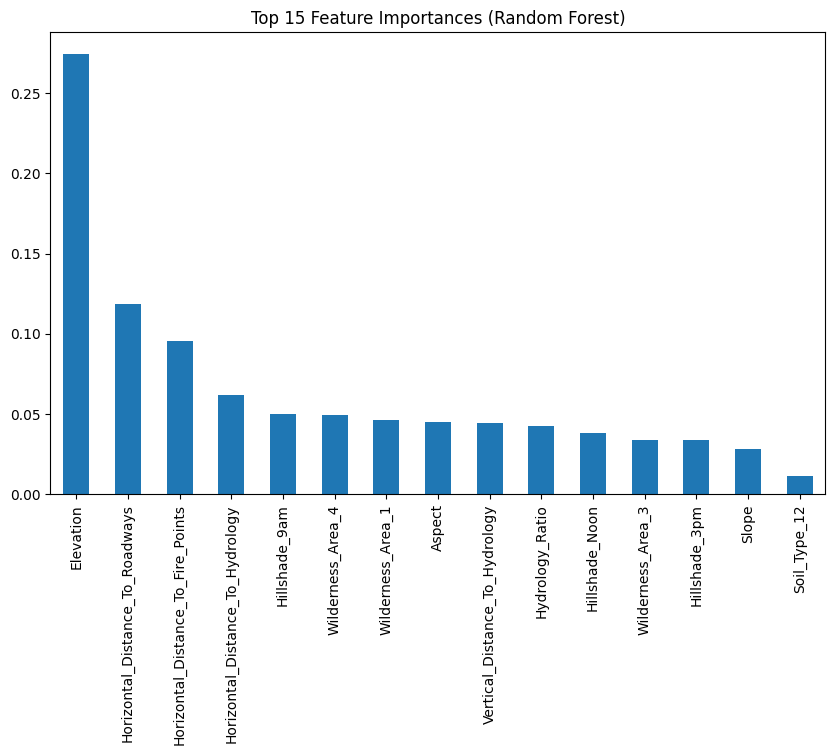

In [20]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(15).plot(kind="bar")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()



## Best Model Selection & Saving


In [25]:

models = {
    "Logistic Regression": lr,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb
}

accuracies = {
    "Logistic Regression": lr_acc,
    "KNN": knn_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "XGBoost": xgb_acc
}

best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print("✅ Best Model:", best_model_name)


✅ Best Model: Random Forest


In [26]:
import joblib
joblib.dump(best_model, "best_model.pkl")
print("✅ Best model saved as best_model.pkl")


✅ Best model saved as best_model.pkl


## Random Forest Hyperparameter Tuning


In [17]:
best_rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train_res, y_train_res)


,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:

 ## Evaluate  Tuned RF


In [18]:
y_pred_best = best_rf.predict(X_test)
print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Tuned RF Accuracy: 0.9924047124047124
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20614
           1       1.00      1.00      1.00     20614
           2       1.00      1.00      1.00     20614
           3       1.00      1.00      1.00     20615
           4       0.99      0.97      0.98     20614
           5       1.00      1.00      1.00     20614
           6       0.97      0.98      0.98     20615

    accuracy                           0.99    144300
   macro avg       0.99      0.99      0.99    144300
weighted avg       0.99      0.99      0.99    144300




## Saved Best Model



In [19]:
joblib.dump(best_rf, "models/best_model.pkl")
print("Best model saved!")


Best model saved!


In [20]:
sample = X_test.iloc[[0]]
pred = best_rf.predict(sample)
final_label = le.inverse_transform(pred)

print("Predicted Cover Type:", final_label[0])





Predicted Cover Type: 1


## ROC-AUC Curves (Multiclass)


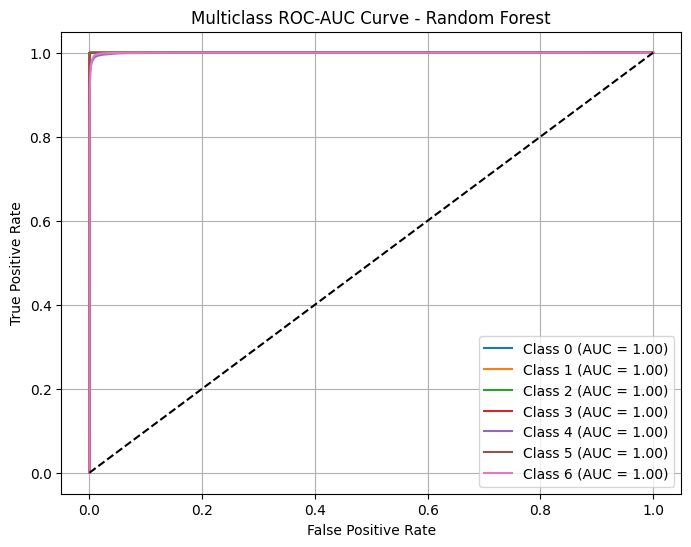

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize target
classes = best_rf.classes_
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities
y_score = best_rf.predict_proba(X_test)

n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC-AUC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


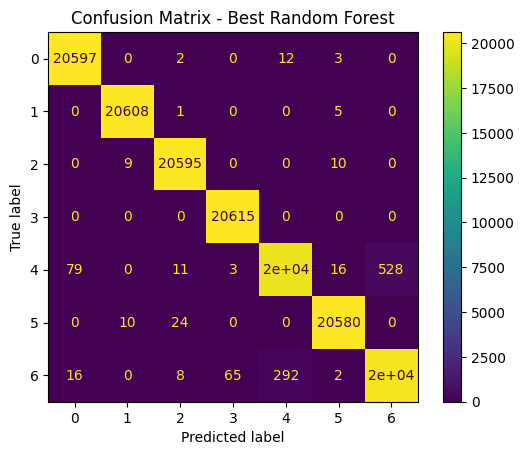

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = best_rf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Best Random Forest")
plt.show()


In [25]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(best_rf, "models/best_model.pkl")
joblib.dump(top_features, "models/top_features.pkl")

print("Model and features saved successfully.")


Model and features saved successfully.


In [26]:
import joblib

joblib.dump(list(scaler.feature_names_in_), "models/model_features.pkl")
print("✅ model_features.pkl saved successfully")


✅ model_features.pkl saved successfully


In [29]:
import joblib

model = joblib.load("models/best_model.pkl")
scaler = joblib.load("models/scaler.pkl")
X_cols = joblib.load("models/model_features.pkl")

class_map = {
    0: "Spruce/Fir",
    1: "Lodgepole Pine",
    2: "Ponderosa Pine",
    3: "Cottonwood/Willow",
    4: "Aspen",
    5: "Douglas-fir",
    6: "Krummholz"
}

joblib.dump(class_map, "models/class_map.pkl")

print("class_map saved")


class_map saved


In [1]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'app.py', 'best_model.pkl', 'data', 'data cleaning.ipynb', 'EDA.ipynb', 'final_preprocessed_data.csv', 'modelling.ipynb', 'models', 'preprocessing.ipynb']


In [2]:
import pandas as pd
import joblib

df = pd.read_csv("final_preprocessed_data.csv")
X = df.drop("Cover_Type", axis=1)

joblib.dump(X.columns.tolist(), "models/model_features.pkl")
joblib.dump(X.min().to_dict(), "models/feature_min.pkl")
joblib.dump(X.max().to_dict(), "models/feature_max.pkl")

print("✅ Feature metadata saved")


✅ Feature metadata saved


In [3]:
import pandas as pd
import joblib

model = joblib.load("best_model.pkl")
features = joblib.load("models/model_features.pkl")

imp = pd.Series(model.feature_importances_, index=features)
print(imp.sort_values(ascending=False).head(10))


Elevation                             0.274319
Horizontal_Distance_To_Roadways       0.118602
Horizontal_Distance_To_Fire_Points    0.095326
Horizontal_Distance_To_Hydrology      0.061744
Hillshade_9am                         0.049946
Wilderness_Area_4                     0.049736
Wilderness_Area_1                     0.046281
Aspect                                0.044967
Vertical_Distance_To_Hydrology        0.044387
Hydrology_Ratio                       0.042564
dtype: float64
